# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>

## <span style="color:blue">  Numerical exercises 1</span>

### Exercise 01.1
- Test the Pseudo-Random Number generator downloaded from the NSL Ariel web site by estimating:

1. $\langle r \rangle = \int_0^1 r dr = 1/2$. <font color="red">Make a picture of the estimation of $\langle r \rangle$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle r \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$.</font>
2. $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$. <font color="red">Make a picture of the estimation of $\sigma^2$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle (r-1/2)^2 \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$.</font>
3. Divide $[0,1]$ into $M$ identical sub-intervals and implement the $\chi^2$ test. Obviously, the number of expected events observed in each sub-interval after $n$ *throws*, according to a uniform distribution, is $np = n\times 1/M= n/M$. Fix $M=10^2$ and use for $n$ the first $10^4$ pseudo-random numbers, then the successive $10^4$ pseudo-random numbers, and so on ... 100 times. <font color="red">Plot $\chi^2_j$ for $j=1, ..., 100$</font>. In this case the chi-square statistic is:
$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$
We should expect on average that $(n_i - n/M)^2 \simeq n/M$ and thus $\chi^2 \simeq 100$, i.e. the number of sub-intervals.
A larger value of $\chi^2$ indicates that the hypothesis ($n_i$ are drawn from a uniform distribution) is rather unlikely ... <font color="red">but before judging</font>, you could compare the histogram of the values obtained for $\chi^2_j$ with the true probability distribution (see: <a href="https://en.wikipedia.org/wiki/Chi-squared_distribution">this Wikipedia link</a>).

### Solution:
- Using a million throws (M=1,000,000) and 1,000-throws sized blocks:

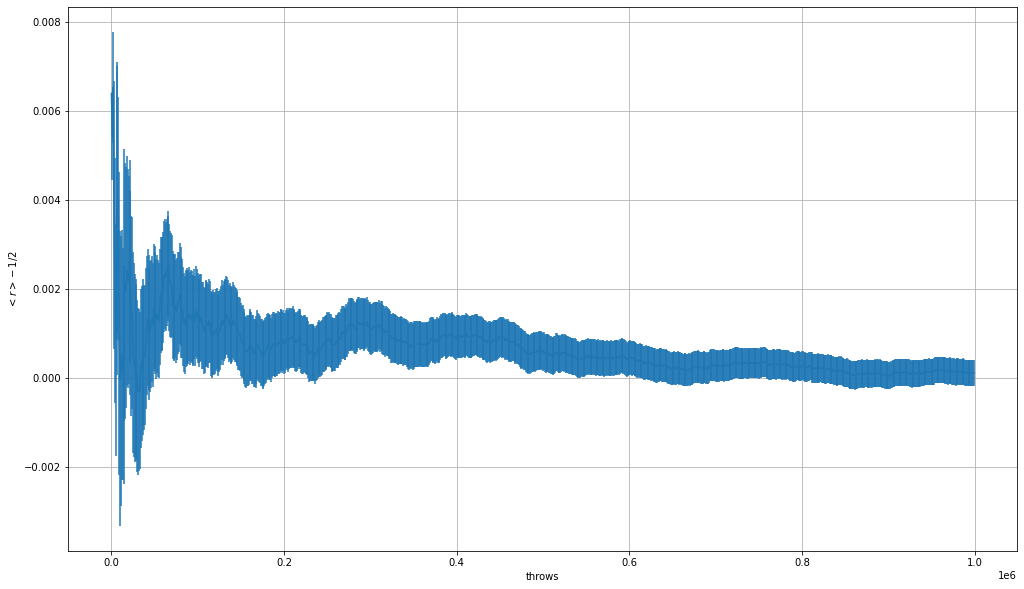

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd 
import scipy.stats as stats

running_avg, sigma, running_variance, variance_sigma = np.loadtxt("./output.dat", unpack= True, usecols=(0,1,2,3), skiprows=0)

N=len(running_avg)
L=1000
x = np.arange(N)      # [0,1,2,...,N-1]
    
x*=L # Number of throws = block * (Number of throws in each block)
plt.figure(figsize=(17,10))
plt.errorbar(x,running_avg-0.5,yerr=sigma)
plt.xlabel('throws')
plt.ylabel('$<r> - 1/2$')
plt.grid(True)
plt.show()

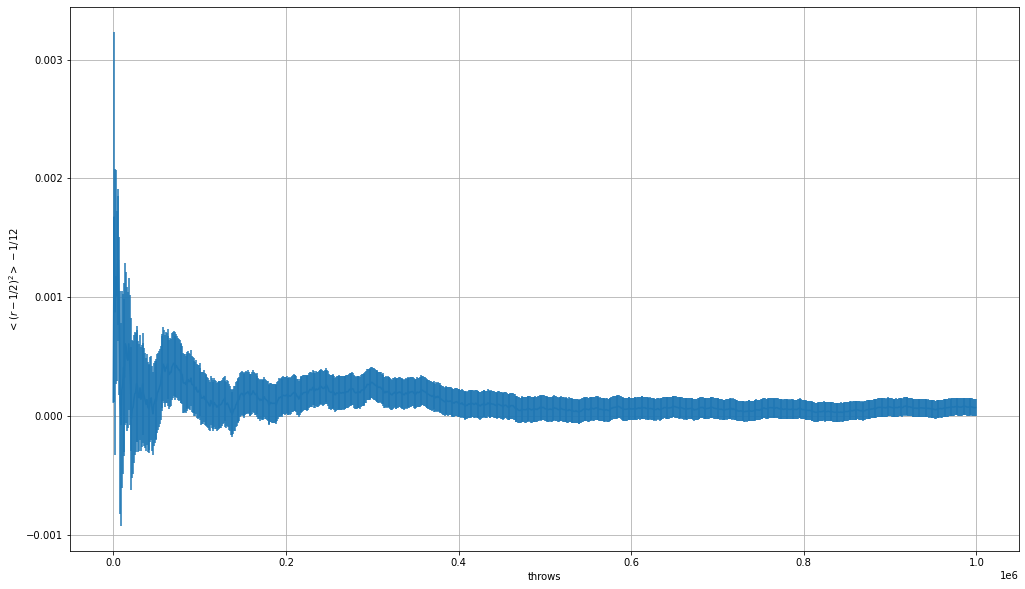

In [2]:
plt.figure(figsize=(17,10))
plt.errorbar(x,running_variance-1/12,yerr=variance_sigma)
plt.xlabel('throws')
plt.ylabel('$<(r-1/2)^2> - 1/12$')
plt.grid(True)
plt.show()

We find both the mean and the variance to be converging to the expected values, within the confidence intervals given by the Standard Deviation. 

The $\chi^2$ test, performed using the suggested parameters (100 tests with 10000 events each), gives the following histogram:

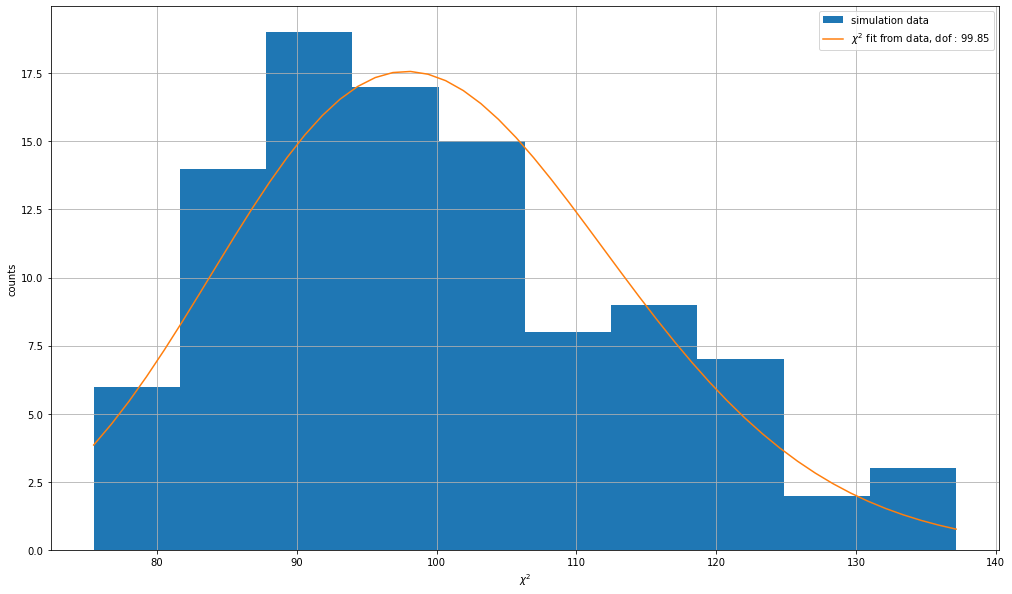

χ² of the fit: 0.0017


In [3]:
#import unicodedata as ud
chi2 = np.loadtxt("./chi.dat", unpack= True, usecols=(0), skiprows=0)

plt.figure(figsize=(17,10))
n, bins, patches = plt.hist(chi2, bins=10, label='simulation data')
plt.xlabel('$\chi^2$')
plt.ylabel('counts')
plt.grid(True)

bin_centers = (bins[:-1] + bins[1:]) / 2  # centers of the bins
bin_width = bins[1] - bins[0]  # width of each bin

x = np.linspace(np.min(chi2), np.max(chi2))
params = stats.chi2.fit(chi2, floc=0, fscale=1)
area = len(chi2) * bin_width #total number of datapoints * bin width = area

#plt.plot(x, area*stats.chi2(100).pdf(x), label=r'$\chi^2$ pdf w/ 100 degrees of freedom')
plt.plot(x, area*stats.chi2.pdf(x, *params), label=r'$\chi^2$ fit from data, dof : ' + f'{params[0]:.2f}')

chisq = np.sum((n - area*stats.chi2.pdf(bin_centers, *params))**2 / area*stats.chi2.pdf(bin_centers, *params))

plt.legend()
plt.show()

print(f'\N{GREEK SMALL LETTER CHI}\N{SUPERSCRIPT TWO} of the fit: {chisq:.4f}')

The data have been fitted using the $\chi^2$ pdf kindly provided by scipy, and are compatible with a Chi-squared distribution with 100 degrees of freedom. 

### Exercise 01.2
- Extend Pseudo-Random Number generator downloaded from the NSL Ariel web site and check the Central Limit Theorem:

1. <font color="red">Add two probability distributions</font> by using the **method of the inversion of the cumulative distribution** to sample from a **generic** <font color="red">exponential distribution</font>, $p(x) = \lambda \exp(-\lambda x)$, $x\in [0;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Exponential_distribution">this Wikipedia link</a>), and a **generic** <font color="red">Cauchy-Lorentz distribution</font> $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$, $x\in [-\infty;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Cauchy_distribution">this Wikipedia link</a>).
2. <font color="red">Make 3 pictures</font> with the histograms obtained filling them with $10^4$ realizations of $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ (for $N=1, 2, 10, 100$), being $x_i$ a random variable sampled throwing a *standard* dice (fig.1), an *exponential* dice (fig.2, use $\lambda=1$) and a *Lorentzian* dice (fig.3, use $\mu=0$ and $\Gamma=1$).

Note tha you can try to fit the case $N=100$ with a Gaussian for standard and exponential dices, whereas you should use a Cauchy-Lorentz distribution for the last case.

### Solution:

The Smirnov transform of the exponential distribution is the inverse of its **cumulative distribution** $F(x) = 1 - \lambda \exp(-\lambda x)$, $x\in [0;+\infty]$, which is:

$$ F^{-1}(y) = \frac{-\ln(1 - y)}{\lambda} $$

for $0 \leq y < 1$, while the cumulative distribution of the Cauchy-Lorentz distribution is $F(x) = \frac{1}{\pi} \arctan{\frac{x - \mu}{\Gamma}} + \frac{1}{2}$, and the inverse is:

$$ F^{-1}(y) = \mu + \Gamma \tan{\left[\pi\left(y - \frac 1 2\right)\right]} $$

again for $0 \leq y < 1$. Using these two formulas and the (pseudo)random number generator Rannyu() (which generates y uniformly distributed in \[0,1) ) I wrote two methods to sample from these two distributions.

I then simulated 10000 throws of a 6-sided die and filled a histogram with the results. I repeated the experiment with 10000 istances of the average of two throws, then 10 throws, then 100. For each of these experiments the data have been plotted in a histogram. For the 100-throws case, I also fitted a normal distribution to the data.

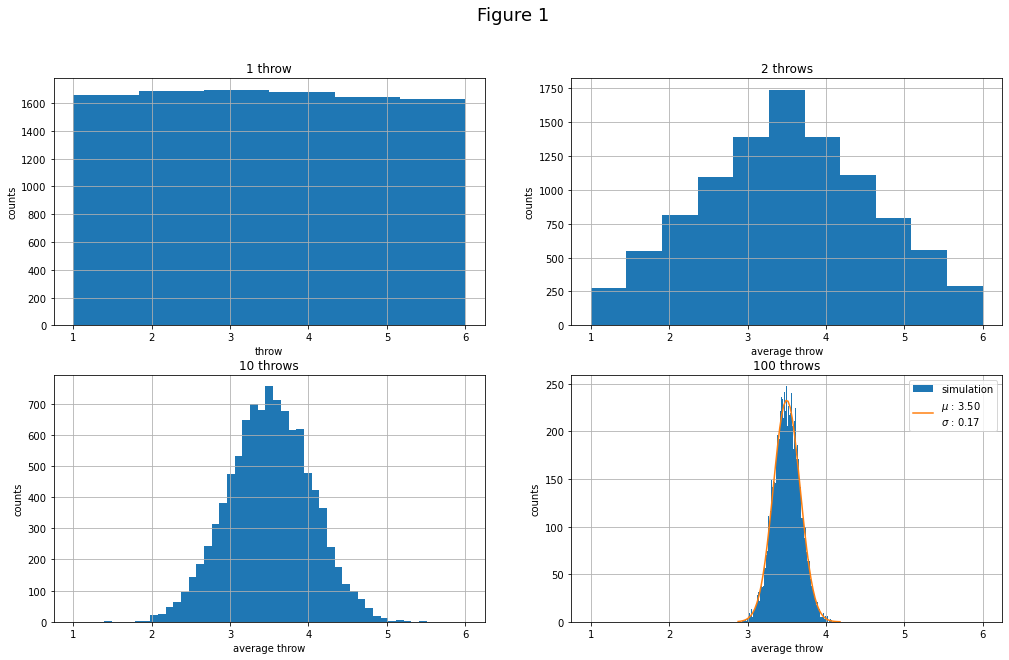

χ² of the fit: 170.7115
reduced χ² of the fit: 0.3414


In [4]:
d6 = pd.read_csv('d6.dat', delimiter='\t', header=None, names=['1', '2', '10', '100', 'trash'])

d6 = d6.drop('trash', axis=1) #weird behaviour of read_csv

fig1, axs = plt.subplots(2, 2, figsize=(17,10))

NUM = [[1, 2], [10, 100]]

N, bins = dict(), dict()
for ax, num in zip(axs, NUM):
    for a, n in zip(ax, num):
        N[n], bins[n], patches = a.hist(d6[str(n)], bins=5*n+1, range=(1,6), label='simulation') 
        #the number of bins is the number of all possible values of the average of n dice
        a.set_xlabel('average throw')
        a.set_ylabel('counts')
        a.set_title(f'{n} throws')
        a.grid(True)
        
axs[0, 0].set_xlabel('throw')
axs[0, 0].set_title('1 throw')

bin_centers = (bins[100][:-1] + bins[100][1:]) / 2  # centers of the bins
bin_width = bins[100][1] - bins[100][0]  # width of each bin

params = stats.norm.fit(d6['100'], loc=0, scale=0)
x = np.linspace(np.min(d6['100']), np.max(d6['100']))
area = len(d6['100']) * bin_width #total number of datapoints * bin width = area

axs[1, 1].plot(x, area*stats.norm.pdf(x, *params), color = 'C1', label=f"$\mu$ : {params[0]:.2f}\n$\sigma$ : {params[1]:.2f}")
axs[1, 1].legend()

chisq = np.sum((N[100] - area*stats.norm.pdf(bin_centers, *params))**2 / area*stats.norm.pdf(bin_centers, *params))
red_chisq = chisq / (len(bins[100]) - 2)

fig1.suptitle('Figure 1', fontsize=18)

plt.show()

print(f'\N{GREEK SMALL LETTER CHI}\N{SUPERSCRIPT TWO} of the fit: {chisq:.4f}')
print(f'reduced \N{GREEK SMALL LETTER CHI}\N{SUPERSCRIPT TWO} of the fit: {red_chisq:.4f}')

As the number of throws increases, the histogram looks more and more like a Gaussian. For the 100-throw case, the data are compatible with a normal distribution centered in 3.5 (which is the expected average throw for a standard die). For uniformly distributed data, the central limit theorem appears to be verified.

Repeating the experiment using the exponential distribution (i.e. data generated using the newly made method) we find:

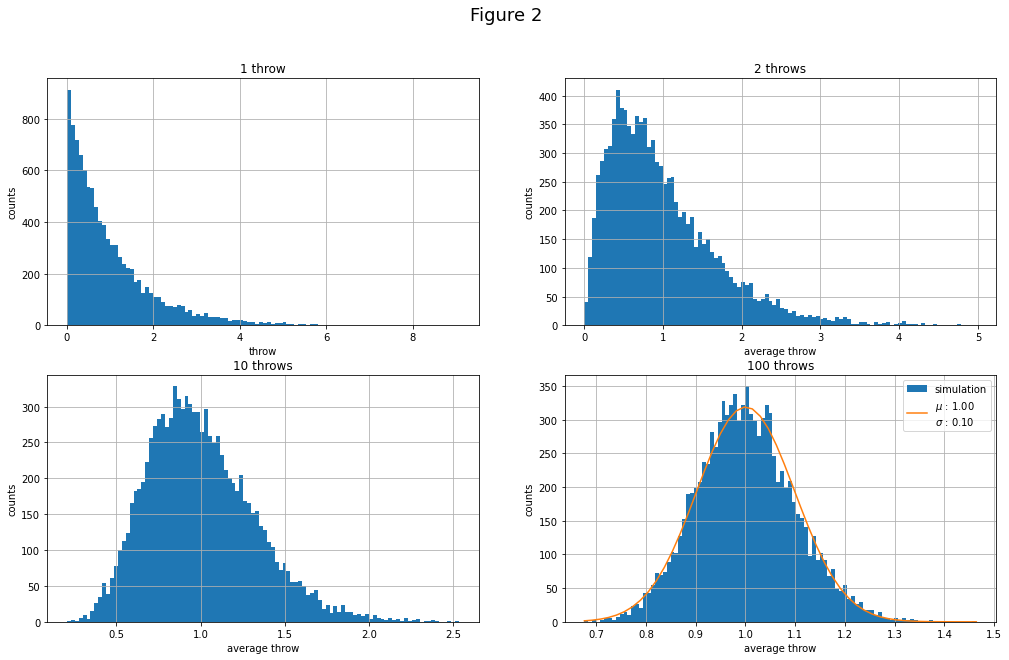

χ² of the fit: 682.2260
reduced χ² of the fit: 6.8912


In [5]:
de = pd.read_csv('de.dat', delimiter='\t', header=None, names=['1', '2', '10', '100', 'trash'])

de = de.drop('trash', axis=1) #weird behaviour of read_csv

fig2, axs = plt.subplots(2, 2, figsize=(17,10))

NUM = [[1, 2], [10, 100]]

N, bins = dict(), dict()
for ax, num in zip(axs, NUM):
    for a, n in zip(ax, num):
        N[n], bins[n], patches = a.hist(de[str(n)], bins=100, label='simulation')
        a.set_xlabel('average throw')
        a.set_ylabel('counts')
        a.set_title(f'{n} throws')
        a.grid(True)
        
axs[0, 0].set_xlabel('throw')
axs[0, 0].set_title('1 throw')

bin_centers = (bins[100][:-1] + bins[100][1:]) / 2  # centers of the bins
bin_width = bins[100][1] - bins[100][0]  # width of each bin

params = stats.norm.fit(de['100'], loc=0, scale=0)
x = np.linspace(np.min(de['100']), np.max(de['100']))
area = len(de['100']) * bin_width #total number of datapoints * bin width = area

axs[1, 1].plot(x, area*stats.norm.pdf(x, *params), color = 'C1', label=f"$\mu$ : {params[0]:.2f}\n$\sigma$ : {params[1]:.2f}")
axs[1, 1].legend()

chisq = np.sum((N[100] - area*stats.norm.pdf(bin_centers, *params))**2 / area*stats.norm.pdf(bin_centers, *params))
red_chisq = chisq / (len(bins[100]) - 2)

fig2.suptitle('Figure 2', fontsize=18)

plt.show()

print(f'\N{GREEK SMALL LETTER CHI}\N{SUPERSCRIPT TWO} of the fit: {chisq:.4f}')
print(f'reduced \N{GREEK SMALL LETTER CHI}\N{SUPERSCRIPT TWO} of the fit: {red_chisq:.4f}')

Data sampled from an exponential distribution, not unlike uniformly distributed data, seem to satisfy the central limit theorem. For the 100-throws case, the data also fit the Gaussian curve.

For the Cauchy-Lorentz distribution, however:

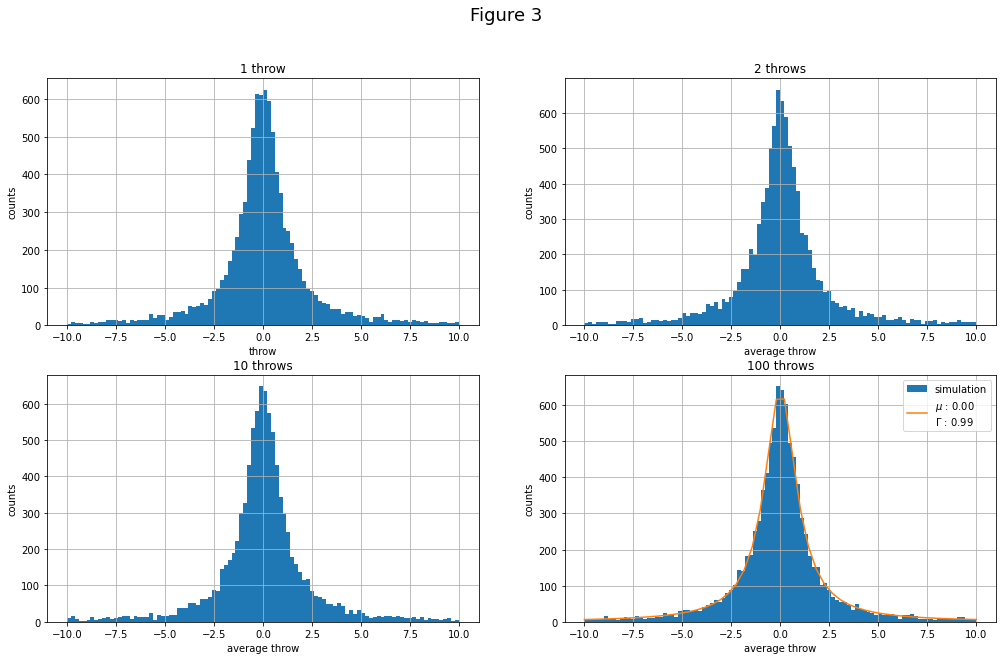

χ² of the fit: 0.8407
reduced χ² of the fit: 0.0085


In [6]:
dl = pd.read_csv('dl.dat', delimiter='\t', header=None, names=['1', '2', '10', '100', 'trash'])

dl = dl.drop('trash', axis=1) #weird behaviour of read_csv

#print(dl)

fig3, axs = plt.subplots(2, 2, figsize=(17,10))

NUM = [[1, 2], [10, 100]]

N, bins = dict(), dict()
for ax, num in zip(axs, NUM):
    for a, n in zip(ax, num):
        N[n], bins[n], patches = a.hist(dl[str(n)], bins=100, label='simulation', range=(-10, 10))
        a.set_xlabel('average throw')
        a.set_ylabel('counts')
        a.set_title(f'{n} throws')
        a.grid(True)
        
axs[0, 0].set_xlabel('throw')
axs[0, 0].set_title('1 throw')

bin_centers = (bins[100][:-1] + bins[100][1:]) / 2  # centers of the bins
bin_width = bins[100][1] - bins[100][0]  # width of each bin

params = stats.cauchy.fit(dl['100'], loc=0, scale=0)
x = np.linspace(-10, 10)
area = len(dl['100']) * bin_width #total number of datapoints * bin width = area

axs[1, 1].plot(x, area*stats.cauchy.pdf(x, *params), color = 'C1', label=f"$\mu$ : {params[0]:.2f}\n$\Gamma$ : {params[1]:.2f}")
axs[1, 1].legend()

chisq = np.sum((N[100] - area*stats.cauchy.pdf(bin_centers, *params))**2 / area*stats.cauchy.pdf(bin_centers, *params))
red_chisq = chisq / (len(bins[100]) - 2)

fig3.suptitle('Figure 3', fontsize=18)

plt.show()

print(f'\N{GREEK SMALL LETTER CHI}\N{SUPERSCRIPT TWO} of the fit: {chisq:.4f}')
print(f'reduced \N{GREEK SMALL LETTER CHI}\N{SUPERSCRIPT TWO} of the fit: {red_chisq:.4f}')

As expected, data sampled from the Cauchy distribution do not satisfy the central limit theorem: in fact, the histogram always looks like a Lorentzian curve, regardless of the number of throws. In the 100-throws case, the data fit a Lorentzian curve, with the same parameters as the original distribution.

Notice that, because of the long tails typical for the Cauchy distribution, datapoints before -10.0 and after 10.0 are not visualized, as any histogram featuring such abnormally distant datapoints would have been unreadable.

### Exercise 01.3
- **Simulate** the Buffon’s experiment (see LSN_Lecture_00, supplementary material):  A needle of length $L$ is thrown at random onto a horizontal plane ruled with straight lines a distance $d$ (must be $d > L$, but do not use $d\gg L$ otherwise $P\ll 1$) apart. The probability $P$ that the needle will intersect one of these lines is: $P = 2L/\pi d$. This could be used to evaluate $\pi$ from throws of the needle: if the needle is thrown down $N_{thr}$ times and is observed to land on a line $N_{hit}$ of those times, we can make an estimate of $\pi$ from
$$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$
<font color="red">Make a picture of the estimation of $\pi$ and its uncertainty (Standard Deviation of the mean) with a large number of *throws* $M$ as a function of the number of blocks, $N$</font> (see below: Computing statistical uncertainties). If possible, do not use $\pi$ to evaluate $\pi$.

### Solution:

To simulate Buffon's experiment I first need a way to generate uniformly distributed angles between 0 and $2\pi$. To do so without using the numerical value $\pi$, I can generate uniformly distributed 2D points in a circle, which has circular symmetry and therefore has no preferential direction. 

To generate these points, my strategy is to use the pseudo-random number generator, which generates uniformly distributed 1D numbers, to generate two variables $x$ & $y$, which are the coordinates of a 2D point in a square of side 2 centered in the origin ($x \in (-1, 1)$, $y \in (-1, 1)$). Now I compute the norm of the vector ($r^2 = x^2 + y^2$). If the norm of the vector is greater than 1, the point is outside the unit circle and it is rejected. Using this method, I can generate 2D vectors uniformely distributed in $\theta$, albeit of different length.

<sub> One could notice that, simply by doing this, I already have a way of estimating $\pi$ with no further work needed: as the probability for a 2D point, generated uniformly in a square, of also being inside the inscribed circle is equivalent to the ratio between the areas of the circle and the square, which is $\pi/4$ </sub>

If the norm is smaller than 1, I divide both $x$ and $y$ by $r$ to get a 2D vector of length 1. This vector is a needle of length 1 with the eye fixed in the origin. Now I only need to generate the position of the head on the floor. Assuming the floor to be an infinite plane crossed by ifinitely many, infinitely long equally spaced horizontal lines, the problem is then invariant for translations along the $x$ axis, so I only need to generate the $y$ coordinate. Given the periodicity of the problem, I only need to generate a number between 0 and $d$, which represents the distance between the eye and the line immediatly below. I use the random number generator to generate a number $z$ between 0 and 1 to be multiplied by $d$. So now I just need to check whether $z \cdot d + y \cdot L / r > d$ or $z \cdot d + y \cdot L / r < 0$.

This procedure can be simplified further by exploiting the symmetries of the unit circle: in particular, I only need to generate numbers in the first quadrant of the cartesian plane, as the problem is invariant for reflections with respect to both the $x$ and $y$ axes. Now $y$ can only be a positive number, so I only need to check whether $z \cdot d + y \cdot L / r > d$, which can be rearranged in $z \cdot d \cdot r + y \cdot L > d \cdot r$. 

So, to recap, the method is articulated in three steps:

1. I generate, using pseudo-random number generator, three numbers $x$, $y$ and $z$ between 0 and 1, and I also compute $r = \sqrt{x^2 + y^2}$;
2. If $r$ is greater than 1, the datapoint is rejected and I go back to step 1. Else, I add 1 to the $N_{throws}$ counter;
3. If $z \cdot d \cdot r + y \cdot L > d \cdot r$, I add 1 to the $N_{hits}$ counter.

My best guess for $\pi$ is given by the ratio between $N_{throws}$ and $N_{hits}$, scaled by $2L/d$.

Using this technique, and the block average method, I computed $\pi$ and the statistical uncertainty on said computation. I chose $d=6$ and $L=5$, and used the same number of blocks and blocksize as before:

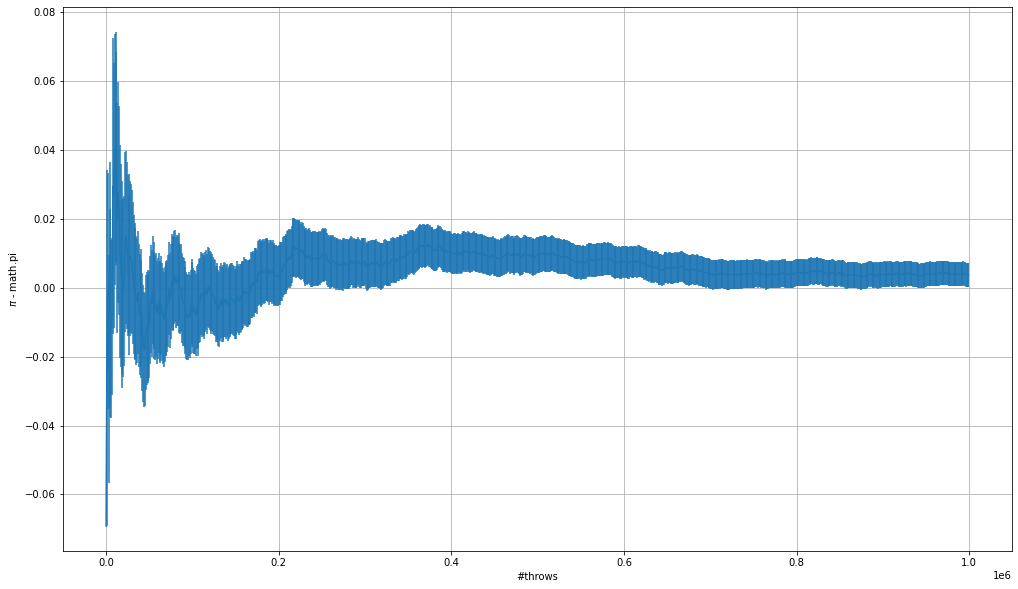

In [7]:
pi, sigma_pi = np.loadtxt("./pi.dat", unpack= True, usecols=(0,1), skiprows=0)

N=len(pi)
x = np.arange(N)
x *= L

plt.figure(figsize=(17,10))
plt.errorbar(x,pi-math.pi,yerr=sigma_pi)
plt.xlabel('#throws')
plt.ylabel('$\pi$ - math.pi')
plt.grid(True)
plt.show()